# 0. IMPORT Libraries

In [0]:
import os
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.preprocessing import minmax_scale

# 1. IMPORT DATA

In [0]:
path = "C:/Users/student/OneDrive/dr/DH_FINAL"

In [0]:
allFiles = glob.glob(os.path.join(path,"201*.csv"))

In [0]:
np_array_list = []
for file_ in allFiles:
    df = pd.read_csv(file_, header=0, engine='python')
    df = df.dropna()
    np_array_list.append(df.as_matrix())

In [0]:
len(np_array_list)

0

In [0]:
comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)

big_frame.columns = ['BikeID', 'DepartureDate', 'DepartureID', 'DepartureName'
                         , 'Num1', 'ArrivalDate', 'ArrivalID', 'ArrivalName', 'Num2'
                         , 'Time', 'Dist']

In [0]:
RD = big_frame[['DepartureDate','DepartureID','ArrivalDate','ArrivalID']]

# 2. 일부 DATA 에 따옴표가 들어있기 때문에 지웁니다

In [0]:
RD_sort = RD.sort_values(by=['DepartureDate'], axis=0)

In [0]:
#위치를 찾기
RD_sort.iloc[4411477:4411479]

,DepartureDate,DepartureID,ArrivalDate,ArrivalID
5088740,'2018-06-30 23:59:58','2169','2018-07-01 00:08:05','2112'
2307245,2018-04-01 0:00,266,2018-04-01 0:07,245


In [0]:
RD1 = RD_sort[:4411478] ## 요기까진 따옴표가 있고
RD2 = RD_sort[4411478:] ## 요기부턴 따옴표가 없음
RD2.head()

,DepartureDate,DepartureID,ArrivalDate,ArrivalID
2307245,2018-04-01 0:00,266,2018-04-01 0:07,245
2307246,2018-04-01 0:00,1946,2018-04-01 0:44,1820
2307262,2018-04-01 0:00,574,2018-04-01 0:27,574
2307261,2018-04-01 0:00,3511,2018-04-01 1:31,3511
2307260,2018-04-01 0:00,1503,2018-04-01 1:24,1709


In [0]:
# 따옴표 제거
RD1.DepartureDate = RD1.DepartureDate.str.lstrip("'").str.rstrip("'")
RD1.DepartureID = RD1.DepartureID.str.lstrip("'").str.rstrip("'")
RD1.ArrivalDate = RD1.ArrivalDate.str.lstrip("'").str.rstrip("'")
RD1.ArrivalID = RD1.ArrivalID.str.lstrip("'").str.rstrip("'")

C:\Users\student\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
RD_re = RD1.append(RD2)
RD_re_sort = RD_re.sort_values(by=['DepartureDate'], axis=0)

In [0]:
RD11 = RD_re_sort.reset_index()
RD11 = RD11.drop('index', axis = 1)

In [0]:
# 2017년 10월부터 2018년 9월까지 1년치 데이터임을 확인
RD11.head(5).append(RD11.tail(5))

,DepartureDate,DepartureID,ArrivalDate,ArrivalID
0,2017-10-01 00:00:00,1906,2017-10-01 00:37:41,1943
1,2017-10-01 00:00:00,1433,2017-10-01 00:13:50,1416
2,2017-10-01 00:00:01,2148,2017-10-01 00:27:43,2141
3,2017-10-01 00:00:05,567,2017-10-01 00:16:01,505
4,2017-10-01 00:00:06,106,2017-10-01 00:29:01,145
8637735,2018-09-30 9:59,1358,2018-09-30 10:53,1358
8637736,2018-09-30 9:59,1358,2018-09-30 10:54,1358
8637737,2018-09-30 9:59,314,2018-09-30 10:07,385
8637738,2018-09-30 9:59,339,2018-09-30 10:07,328
8637739,2018-09-30 9:59,1429,2018-09-30 10:09,1411


In [0]:
RD11.to_csv("refined_data.csv", mode='w')

# 3. 시간 데이터의 datatype이 string 이므로 datetime으로 바꿔줍니다

In [0]:
df = pd.read_csv('refined_data.csv')

In [0]:
# 시간데이터가 '2018-00-00 00:00' 의 형태와 '2018-00-00 00:00:00'형태 두가지가 있어 두 경우를 나누어서 datetime 형태로 변환시켜줌
departure = []
arrival = []

for i in range(len(df)):
    
    if len(df.DepartureDate[i]) < 17:
        arrival.append(datetime.datetime.strptime(df.ArrivalDate[i],"%Y-%m-%d %H:%M"))
        departure.append(datetime.datetime.strptime(df.DepartureDate[i],"%Y-%m-%d %H:%M"))
        
    elif len(df.DepartureDate[i]) == 19:
        arrival.append(datetime.datetime.strptime(df.ArrivalDate[i],"%Y-%m-%d %H:%M:%S"))
        departure.append(datetime.datetime.strptime(df.DepartureDate[i],"%Y-%m-%d %H:%M:%S"))
    else:
        pass


In [0]:
df['departure'] = departure 
df['arrival'] = arrival

In [0]:
fin_dt = df.copy().drop(['Unnamed: 0', 'DepartureDate', 'ArrivalDate'], axis = 1)

In [0]:
fin_dt.head(5).append(fin_dt.tail(5))

,DepartureID,ArrivalID,departure,arrival
0,1906,1943,2017-10-01 00:00:00,2017-10-01 00:37:41
1,1433,1416,2017-10-01 00:00:00,2017-10-01 00:13:50
2,2148,2141,2017-10-01 00:00:01,2017-10-01 00:27:43
3,567,505,2017-10-01 00:00:05,2017-10-01 00:16:01
4,106,145,2017-10-01 00:00:06,2017-10-01 00:29:01
8637735,1358,1358,2018-09-30 09:59:00,2018-09-30 10:53:00
8637736,1358,1358,2018-09-30 09:59:00,2018-09-30 10:54:00
8637737,314,385,2018-09-30 09:59:00,2018-09-30 10:07:00
8637738,339,328,2018-09-30 09:59:00,2018-09-30 10:07:00
8637739,1429,1411,2018-09-30 09:59:00,2018-09-30 10:09:00


In [0]:
fin_dt.to_csv("data_format.csv", mode='w')

In [0]:
#235

# 4. departure과 arrival의 dataframe으로 나누고 휴일/평일 정보 입력

## *필수! 아래 df2를 로드하세요!!!!

In [0]:
df2 = pd.read_csv('data_format.csv')

In [0]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [0]:
df2.head(5).append(df2.tail(5))

,DepartureID,ArrivalID,departure,arrival
0,1906,1943,2017-10-01 00:00:00,2017-10-01 00:37:41
1,1433,1416,2017-10-01 00:00:00,2017-10-01 00:13:50
2,2148,2141,2017-10-01 00:00:01,2017-10-01 00:27:43
3,567,505,2017-10-01 00:00:05,2017-10-01 00:16:01
4,106,145,2017-10-01 00:00:06,2017-10-01 00:29:01
8637735,1358,1358,2018-09-30 09:59:00,2018-09-30 10:53:00
8637736,1358,1358,2018-09-30 09:59:00,2018-09-30 10:54:00
8637737,314,385,2018-09-30 09:59:00,2018-09-30 10:07:00
8637738,339,328,2018-09-30 09:59:00,2018-09-30 10:07:00
8637739,1429,1411,2018-09-30 09:59:00,2018-09-30 10:09:00


In [0]:
df2['arrival'] = pd.to_datetime(df2['arrival'])
df2['departure'] = pd.to_datetime(df2['departure'])

In [0]:
df2['depweekday'] = df2['departure'].dt.weekday
df2['arrweekday'] = df2['arrival'].dt.weekday

In [0]:
df2['depweekend'] = df2['depweekday']>=5
df2['arrweekend'] = df2['arrweekday']>=5

In [0]:
df2['depholiday'] = \
((df2['departure'].dt.date == datetime.date(2017, 10, 2))|\
(df2['departure'].dt.date == datetime.date(2017, 10, 3))|\
(df2['departure'].dt.date == datetime.date(2017, 10, 4))|\
(df2['departure'].dt.date == datetime.date(2017, 10, 5))|\
(df2['departure'].dt.date == datetime.date(2017, 10, 6))|\
(df2['departure'].dt.date == datetime.date(2017, 10, 9))|\
(df2['departure'].dt.date == datetime.date(2017, 12, 25))|\
(df2['departure'].dt.date == datetime.date(2018, 1, 1))|\
(df2['departure'].dt.date == datetime.date(2018, 2, 15))|\
(df2['departure'].dt.date == datetime.date(2018, 2, 16))|\
(df2['departure'].dt.date == datetime.date(2018, 2, 17))|\
(df2['departure'].dt.date == datetime.date(2018, 3, 1))|\
(df2['departure'].dt.date == datetime.date(2018, 5, 5))|\
(df2['departure'].dt.date == datetime.date(2018, 5, 7))|\
(df2['departure'].dt.date == datetime.date(2018, 5, 22))|\
(df2['departure'].dt.date == datetime.date(2018, 6, 6))|\
(df2['departure'].dt.date == datetime.date(2018, 6, 13))|\
(df2['departure'].dt.date == datetime.date(2018, 8, 15))|\
(df2['departure'].dt.date == datetime.date(2018, 9, 23))|\
(df2['departure'].dt.date == datetime.date(2018, 9, 24))|\
(df2['departure'].dt.date == datetime.date(2018, 9, 25))|\
(df2['departure'].dt.date == datetime.date(2018, 9, 26)))

df2['arrholiday'] = \
((df2['arrival'].dt.date == datetime.date(2017, 10, 2))|\
(df2['arrival'].dt.date == datetime.date(2017, 10, 3))|\
(df2['arrival'].dt.date == datetime.date(2017, 10, 4))|\
(df2['arrival'].dt.date == datetime.date(2017, 10, 5))|\
(df2['arrival'].dt.date == datetime.date(2017, 10, 6))|\
(df2['arrival'].dt.date == datetime.date(2017, 10, 9))|\
(df2['arrival'].dt.date == datetime.date(2017, 12, 25))|\
(df2['arrival'].dt.date == datetime.date(2018, 1, 1))|\
(df2['arrival'].dt.date == datetime.date(2018, 2, 15))|\
(df2['arrival'].dt.date == datetime.date(2018, 2, 16))|\
(df2['arrival'].dt.date == datetime.date(2018, 2, 17))|\
(df2['arrival'].dt.date == datetime.date(2018, 3, 1))|\
(df2['arrival'].dt.date == datetime.date(2018, 5, 5))|\
(df2['arrival'].dt.date == datetime.date(2018, 5, 7))|\
(df2['arrival'].dt.date == datetime.date(2018, 5, 22))|\
(df2['arrival'].dt.date == datetime.date(2018, 6, 6))|\
(df2['arrival'].dt.date == datetime.date(2018, 6, 13))|\
(df2['arrival'].dt.date == datetime.date(2018, 8, 15))|\
(df2['arrival'].dt.date == datetime.date(2018, 9, 23))|\
(df2['arrival'].dt.date == datetime.date(2018, 9, 24))|\
(df2['arrival'].dt.date == datetime.date(2018, 9, 25))|\
(df2['arrival'].dt.date == datetime.date(2018, 9, 26)))


In [0]:
df2.head(5).append(df2.tail(5))

,DepartureID,ArrivalID,departure,arrival,depweekday,arrweekday,depweekend,arrweekend,depholiday,arrholiday
0,1906,1943,2017-10-01 00:00:00,2017-10-01 00:37:41,6,6,True,True,False,False
1,1433,1416,2017-10-01 00:00:00,2017-10-01 00:13:50,6,6,True,True,False,False
2,2148,2141,2017-10-01 00:00:01,2017-10-01 00:27:43,6,6,True,True,False,False
3,567,505,2017-10-01 00:00:05,2017-10-01 00:16:01,6,6,True,True,False,False
4,106,145,2017-10-01 00:00:06,2017-10-01 00:29:01,6,6,True,True,False,False
8637735,1358,1358,2018-09-30 09:59:00,2018-09-30 10:53:00,6,6,True,True,False,False
8637736,1358,1358,2018-09-30 09:59:00,2018-09-30 10:54:00,6,6,True,True,False,False
8637737,314,385,2018-09-30 09:59:00,2018-09-30 10:07:00,6,6,True,True,False,False
8637738,339,328,2018-09-30 09:59:00,2018-09-30 10:07:00,6,6,True,True,False,False
8637739,1429,1411,2018-09-30 09:59:00,2018-09-30 10:09:00,6,6,True,True,False,False


In [0]:
df_nred_dep = (df2[(df2['depholiday']==0) & (df2['depweekend']==0)])
df_nred_arr = (df2[(df2['arrholiday']==0) & (df2['arrweekend']==0)])

In [0]:
df_nred_dep = df_nred_dep[['DepartureID','departure','depweekday','depweekend','depholiday']]
df_nred_arr = df_nred_arr[['ArrivalID', 'arrival', 'arrweekday', 'arrweekend', 'arrholiday']]

In [0]:
df_nred_dep.head().append(df_nred_dep.tail())

,DepartureID,departure,depweekday,depweekend,depholiday
240256,320,2017-10-10 00:00:01,1,False,False
240257,579,2017-10-10 00:00:03,1,False,False
240258,1606,2017-10-10 00:00:05,1,False,False
240259,1601,2017-10-10 00:00:06,1,False,False
240260,184,2017-10-10 00:00:15,1,False,False
8518942,943,2018-09-28 09:59:00,4,False,False
8518943,108,2018-09-28 09:59:00,4,False,False
8518944,301,2018-09-28 09:59:00,4,False,False
8518945,1668,2018-09-28 09:59:00,4,False,False
8518946,1348,2018-09-28 09:59:00,4,False,False


In [0]:
df_red_dep = (df2[(df2['depholiday']==1) | (df2['depweekend']==1)])
df_red_arr = (df2[(df2['arrholiday']==1) | (df2['arrweekend']==1)])

In [0]:
df_red_dep = df_red_dep[['DepartureID','departure','depweekday','depweekend','depholiday']]
df_red_arr = df_red_arr[['ArrivalID', 'arrival', 'arrweekday', 'arrweekend', 'arrholiday']]

In [0]:
df_red_dep.head().append(df_red_dep.tail())

,DepartureID,departure,depweekday,depweekend,depholiday
0,1906,2017-10-01 00:00:00,6,True,False
1,1433,2017-10-01 00:00:00,6,True,False
2,2148,2017-10-01 00:00:01,6,True,False
3,567,2017-10-01 00:00:05,6,True,False
4,106,2017-10-01 00:00:06,6,True,False
8637735,1358,2018-09-30 09:59:00,6,True,False
8637736,1358,2018-09-30 09:59:00,6,True,False
8637737,314,2018-09-30 09:59:00,6,True,False
8637738,339,2018-09-30 09:59:00,6,True,False
8637739,1429,2018-09-30 09:59:00,6,True,False


# 5. 많이 사용되는 시간대 확인

### (1) 일일 이용량 - 1년 그래프 (x ~ 날짜 / y ~ 이용량)


In [0]:
dd4 = df2['departure'].dt.date.value_counts()
dd4 = dd4.sort_index(ascending=1)
dd4.head().append(dd4.tail())

2017-10-01    10529
2017-10-02    27980
2017-10-03    22077
2017-10-04    19417
2017-10-05    26262
2018-09-26    57289
2018-09-27    57705
2018-09-28    59107
2018-09-29    63399
2018-09-30    55394
Name: departure, dtype: int64

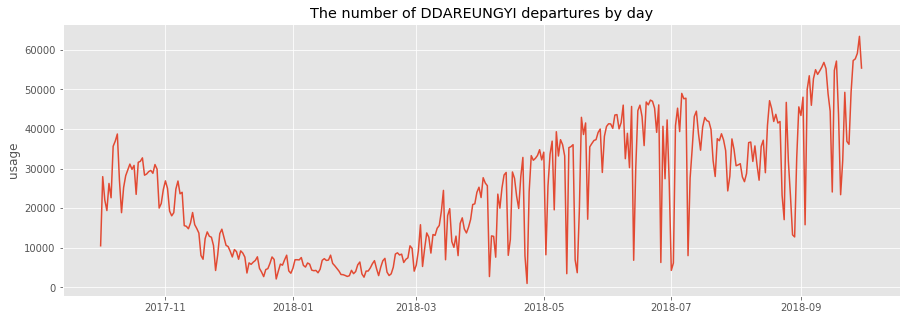

In [0]:
%matplotlib inline
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(15,5))
    dd4.plot(ax=ax)
    
    plt.ylabel('usage')
    plt.title('The number of DDAREUNGYI departures by day')  

### (2) 연간 요일 평균 그래프 (x ~ 요일 / y ~ 이용량)

In [0]:
df3 = df2[(df2['depholiday']==0)]
df4 = df2[(df2['depholiday']==1)&(df2['depweekend']==1)]
df5 = df3.append(df4)
df5.head()

,DepartureID,ArrivalID,departure,arrival,depweekday,arrweekday,depweekend,arrweekend,depholiday,arrholiday
0,1906,1943,2017-10-01 00:00:00,2017-10-01 00:37:41,6,6,True,True,False,False
1,1433,1416,2017-10-01 00:00:00,2017-10-01 00:13:50,6,6,True,True,False,False
2,2148,2141,2017-10-01 00:00:01,2017-10-01 00:27:43,6,6,True,True,False,False
3,567,505,2017-10-01 00:00:05,2017-10-01 00:16:01,6,6,True,True,False,False
4,106,145,2017-10-01 00:00:06,2017-10-01 00:29:01,6,6,True,True,False,False


In [0]:
dd3 = pd.DataFrame(df5['departure'].dt.weekday.value_counts())
dd3 = dd3.sort_index(ascending=1)
dd3 # (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)

,departure
0,1039213
1,1179932
2,1061574
3,1172303
4,1302468
5,1281419
6,1147031


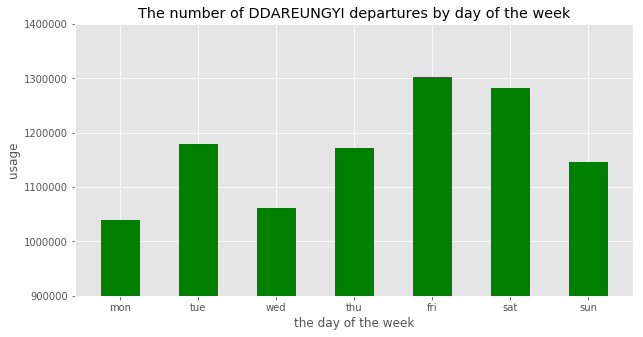

In [0]:
%matplotlib inline
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,5))
    plt.bar(x = dd3.index, height = dd3.departure, label='the day of the week', color = 'green', width = 0.5)
    a = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    plt.xticks(dd3.index, a)
    plt.xlabel('the day of the week')
    plt.ylabel('usage')
    #plt.legend()
    plt.title('The number of DDAREUNGYI departures by day of the week')    
    plt.ylim(900000, 1400000)
    plt.show()

### (3) 연간 평일/휴일 시간대별 출발 그래프 (x ~ 시간대 / y ~ 이용량)

In [0]:
dd1 = pd.DataFrame(df_nred_dep['departure'].dt.hour.value_counts())
dd1 = dd1.sort_index(ascending=1)
dd2 = pd.DataFrame(df_red_dep['departure'].dt.hour.value_counts())
dd2 = dd2.sort_index(ascending=1)

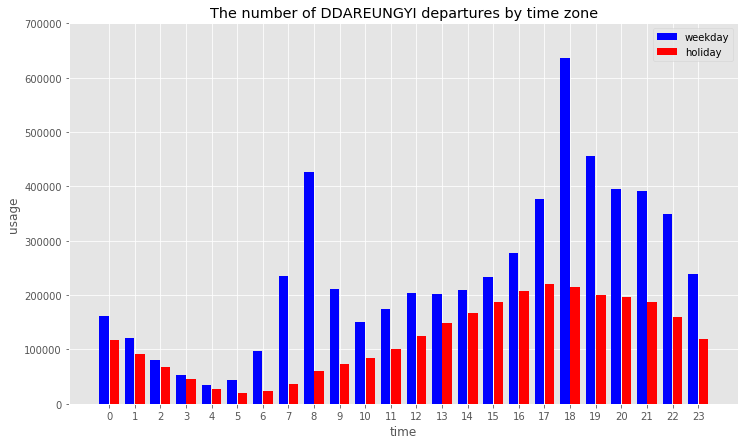

In [0]:
%matplotlib inline
with plt.style.context('ggplot'):
    plt.figure(figsize=(12,7))
    plt.bar(x = dd1.index-0.2, height = dd1.departure, label='weekday', color = 'blue', width=0.37)
    plt.bar(x = dd1.index+0.2, height = dd2.departure, label='holiday', color = 'red', width=0.37)
    plt.xticks(dd2.index)
    plt.xlabel('time')
    plt.ylabel('usage')
    plt.legend()
    plt.title('The number of DDAREUNGYI departures by time zone')    
    plt.ylim(0,700000)
    plt.show()

### (4) 연간 평일/휴일 시간대별 도착 그래프 (x ~ 시간대 / y ~ 이용량)

In [0]:
dd5 = pd.DataFrame(df_nred_arr['arrival'].dt.hour.value_counts())
dd5 = dd5.sort_index(ascending=1)
dd6 = pd.DataFrame(df_red_arr['arrival'].dt.hour.value_counts())
dd6 = dd6.sort_index(ascending=1)

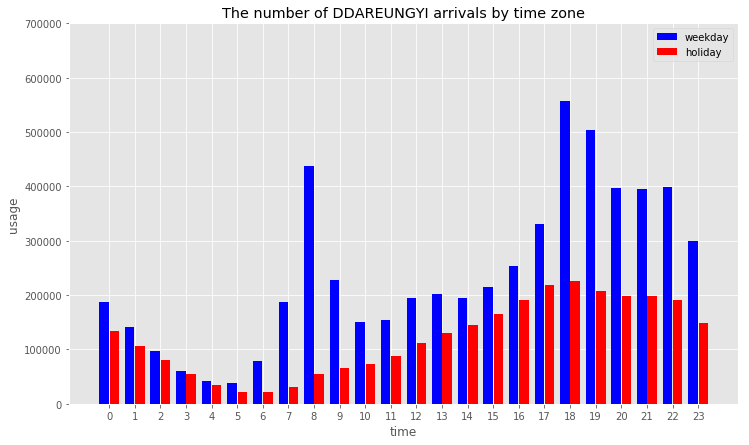

In [0]:
%matplotlib inline
with plt.style.context('ggplot'):
    plt.figure(figsize=(12,7))
    plt.bar(x = dd5.index-0.2, height = dd5.arrival, label='weekday', color = 'blue', width=0.37)
    plt.bar(x = dd6.index+0.2, height = dd6.arrival, label='holiday', color = 'red', width=0.37)
    plt.xticks(dd2.index)
    plt.xlabel('time')
    plt.ylabel('usage')
    plt.legend()
    plt.title('The number of DDAREUNGYI arrivals by time zone')    
    plt.ylim(0,700000)
    plt.show()

### 따릉이가 주로 '주중'의 '7~10시' 및 '17~18시' 에 많이 이용되는 것을 확인하였다.

# 6. 데이터를 시간대로 나누고, 각 시간대의 대여 반납으로 나눈다.

출근 : 07:00 ~ 09:59  (3시간)
퇴근 : 17:00 ~ 19:59  (3시간)


In [0]:
nred_chulgeun_dep = df_nred_dep[(df_nred_dep['departure'].dt.hour >= 7 ) & (df_nred_dep['departure'].dt.hour<10)] 
nred_toegeun_dep = df_nred_dep[(df_nred_dep['departure'].dt.hour >= 17 ) & (df_nred_dep['departure'].dt.hour<20)]
nred_8_dep = df_nred_dep[(df_nred_dep['departure'].dt.hour == 8)]
nred_18_dep = df_nred_dep[(df_nred_dep['departure'].dt.hour == 18)]

In [0]:
nred_chulgeun_dep_count = pd.DataFrame(nred_chulgeun_dep.groupby('DepartureID').count()['departure'])
nred_toegeun_dep_count = pd.DataFrame(nred_toegeun_dep.groupby('DepartureID').count()['departure'])
nred_8_dep_count = pd.DataFrame(nred_8_dep.groupby('DepartureID').count()['departure'])
nred_18_dep_count = pd.DataFrame(nred_18_dep.groupby('DepartureID').count()['departure'])

In [0]:
nred_chulgeun_dep_count.columns = ['chulgeun_dep_count']
nred_toegeun_dep_count.columns = ['toegeun_dep_count']
nred_8_dep_count.columns = ['8_dep_count']
nred_18_dep_count.columns = ['18_dep_count']

In [0]:
nred_8_dep_count.head()

,8_dep_count
DepartureID,
101,378
102,1059
103,380
104,244
105,354


In [0]:
nred_chulgeun_arr = df_nred_arr[(df_nred_arr['arrival'].dt.hour >= 7 ) & (df_nred_arr['arrival'].dt.hour<10)] 
nred_toegeun_arr = df_nred_arr[(df_nred_arr['arrival'].dt.hour >= 17 ) & (df_nred_arr['arrival'].dt.hour<20)]
nred_8_arr = df_nred_arr[(df_nred_arr['arrival'].dt.hour == 8)]
nred_18_arr = df_nred_arr[(df_nred_arr['arrival'].dt.hour == 18)]


In [0]:
nred_chulgeun_arr_count = pd.DataFrame(nred_chulgeun_arr.groupby('ArrivalID').count()['arrival'])
nred_toegeun_arr_count = pd.DataFrame(nred_toegeun_arr.groupby('ArrivalID').count()['arrival'])
nred_8_arr_count = pd.DataFrame(nred_8_arr.groupby('ArrivalID').count()['arrival'])
nred_18_arr_count = pd.DataFrame(nred_18_arr.groupby('ArrivalID').count()['arrival'])

In [0]:
nred_chulgeun_arr_count.columns = ['chulgeun_arr_count']
nred_toegeun_arr_count.columns = ['toegeun_arr_count']
nred_8_arr_count.columns = ['8_arr_count']
nred_18_arr_count.columns = ['18_arr_count']

In [0]:
nred_8_arr_count.head()

,8_arr_count
ArrivalID,
101,85
102,463
103,417
104,684
105,201


In [0]:
nred_chulgeun = pd.merge(nred_chulgeun_dep_count, nred_chulgeun_arr_count, left_index=True, right_index=True, how = 'outer')
nred_toegeun = pd.merge(nred_toegeun_dep_count, nred_toegeun_arr_count, left_index=True, right_index=True, how = 'outer')
nred_8 = pd.merge(nred_8_dep_count, nred_8_arr_count, left_index=True, right_index=True, how = 'outer')
nred_18 = pd.merge(nred_18_dep_count, nred_18_arr_count, left_index=True, right_index=True, how = 'outer')

In [0]:
nonred1 = pd.merge(nred_chulgeun, nred_toegeun, left_index=True, right_index=True, how = 'outer')
nonred2 = pd.merge(nred_8, nred_18,  left_index=True, right_index=True, how = 'outer')
nonred = pd.merge(nonred1, nonred2,  left_index=True, right_index=True, how = 'outer')
nonred.head()

,chulgeun_dep_count,chulgeun_arr_count,toegeun_dep_count,toegeun_arr_count,8_dep_count,8_arr_count,18_dep_count,18_arr_count
101,879.0,241.0,843.0,881,378.0,85.0,379.0,332.0
102,2003.0,1338.0,3434.0,3362,1059.0,463.0,1362.0,1273.0
103,1062.0,969.0,2015.0,2179,380.0,417.0,719.0,809.0
104,592.0,1480.0,2916.0,2226,244.0,684.0,1287.0,874.0
105,722.0,487.0,1456.0,1208,354.0,201.0,516.0,450.0


In [0]:
len(nonred)

1317

# 7. 각 대여소별 출/퇴근 시간대의 일평균 사용량


In [0]:
nred_chulgeun_dep.head()

,DepartureID,departure,depweekday,depweekend,depholiday
243230,1603,2017-10-10 07:00:01,1,False,False
243231,916,2017-10-10 07:00:07,1,False,False
243232,909,2017-10-10 07:00:23,1,False,False
243233,1213,2017-10-10 07:00:24,1,False,False
243234,1218,2017-10-10 07:00:26,1,False,False


In [0]:
nred_chulgeun_dep_pivot = nred_chulgeun_dep.pivot_table(index = 'DepartureID', columns = nred_chulgeun_dep['departure'].dt.date, aggfunc={'DepartureID' : 'count'})
nred_chulgeun_arr_pivot = nred_chulgeun_arr.pivot_table(index = 'ArrivalID', columns = nred_chulgeun_arr['arrival'].dt.date, aggfunc={'ArrivalID' : 'count'})
nred_toegeun_dep_pivot = nred_toegeun_dep.pivot_table(index = 'DepartureID', columns = nred_toegeun_dep['departure'].dt.date, aggfunc={'DepartureID' : 'count'})
nred_toegeun_arr_pivot = nred_toegeun_arr.pivot_table(index = 'ArrivalID', columns = nred_toegeun_arr['arrival'].dt.date, aggfunc={'ArrivalID' : 'count'})
nred_8_dep_pivot = nred_8_dep.pivot_table(index = 'DepartureID', columns = nred_8_dep['departure'].dt.date, aggfunc={'DepartureID' : 'count'})
nred_8_arr_pivot = nred_8_arr.pivot_table(index = 'ArrivalID', columns = nred_8_arr['arrival'].dt.date, aggfunc={'ArrivalID' : 'count'})
nred_18_dep_pivot = nred_18_dep.pivot_table(index = 'DepartureID', columns = nred_18_dep['departure'].dt.date, aggfunc={'DepartureID' : 'count'})
nred_18_arr_pivot = nred_18_arr.pivot_table(index = 'ArrivalID', columns = nred_18_arr['arrival'].dt.date, aggfunc={'ArrivalID' : 'count'})

In [0]:
nred_chulgeun_dep_pivot['mean'] = nred_chulgeun_dep_pivot.mean(axis=1)
nred_chulgeun_arr_pivot['mean'] = nred_chulgeun_arr_pivot.mean(axis=1)
nred_toegeun_dep_pivot['mean'] = nred_toegeun_dep_pivot.mean(axis=1)
nred_toegeun_arr_pivot['mean'] = nred_toegeun_arr_pivot.mean(axis=1)
nred_8_dep_pivot['mean'] = nred_8_dep_pivot.mean(axis=1)
nred_8_arr_pivot['mean'] = nred_8_arr_pivot.mean(axis=1)
nred_18_dep_pivot['mean'] = nred_18_dep_pivot.mean(axis=1)
nred_18_arr_pivot['mean'] = nred_18_arr_pivot.mean(axis=1)

In [0]:
nred_chulgeun_dep_pivot.index.name = 'ID' 
nred_chulgeun_arr_pivot.index.name = 'ID'
nred_toegeun_dep_pivot.index.name = 'ID' 
nred_toegeun_arr_pivot.index.name = 'ID'
nred_8_dep_pivot.index.name = 'ID' 
nred_8_arr_pivot.index.name = 'ID'
nred_18_dep_pivot.index.name = 'ID' 
nred_18_arr_pivot.index.name = 'ID'

In [0]:
nr_cg = pd.merge(nred_chulgeun_dep_pivot, nred_chulgeun_arr_pivot, left_index=True, right_index=True, how = 'outer')
nr_cg1 = nr_cg.copy()[['mean_x', 'mean_y']]
nr_cg1.index.name = 'ID'
nr_cg1.columns = ['dep', 'arr']
nr_cg1.head()

,dep,arr
ID,,
101,3.977376,1.709220
102,8.487288,6.341232
103,4.720000,4.486111
104,3.035897,6.607143
105,3.740933,2.675824


In [0]:
nr_tg = pd.merge(nred_toegeun_dep_pivot, nred_toegeun_arr_pivot, left_index=True, right_index=True, how = 'outer')
nr_tg1 = nr_tg.copy()[['mean_x', 'mean_y']]
nr_tg1.index.name = 'ID'
nr_tg1.columns = ['dep', 'arr']
nr_tg1.head()

,dep,arr
ID,,
101,4.033493,4.155660
102,15.330357,14.245763
103,9.243119,9.949772
104,12.568966,9.763158
105,6.558559,5.752381


In [0]:
nr_8 = pd.merge(nred_8_dep_pivot, nred_8_arr_pivot, left_index=True, right_index=True, how = 'outer')
nr_81 = nr_8.copy()[['mean_x', 'mean_y']]
nr_81.index.name = 'ID'
nr_81.columns = ['dep', 'arr']
nr_81.head()

,dep,arr
ID,,
101,2.088398,1.214286
102,4.545064,2.789157
103,2.159091,2.194737
104,1.807407,3.152074
105,2.171779,1.582677


In [0]:
nr_18 = pd.merge(nred_18_dep_pivot, nred_18_arr_pivot, left_index=True, right_index=True, how = 'outer')
nr_181 = nr_18.copy()[['mean_x', 'mean_y']]
nr_181.index.name = 'ID'
nr_181.columns = ['dep', 'arr']
nr_181.head()

,dep,arr
ID,,
101,2.669014,2.155844
102,6.742574,5.866359
103,3.744792,4.257895
104,5.903670,4.414141
105,2.882682,2.743902


In [0]:
nr_cg.to_csv('nr_cg_2.csv',mode='w')
nr_tg.to_csv('nr_tg_2.csv',mode='w')
nr_8.to_csv('nr_8_2.csv',mode='w')
nr_18.to_csv('nr_18_2.csv',mode='w')

pivot 으로 구한 데이터에서 Nan 값은 이용이 되지 않았다는 뜻이므로, 평균을 구할때 Nan라 포함이 안되는 것을 방지하기위해 직접 셀 갯수를 세서 평균을 재 계산 함 (엑셀에서 작업함)

In [0]:
nr_cg_p_re = pd.read_csv('nr_cg_2.csv')
nr_tg_p_re = pd.read_csv('nr_tg_2.csv')
nr_8_p_re = pd.read_csv('nr_8_2.csv')
nr_18_p_re = pd.read_csv('nr_18_2.csv')

In [0]:
nr_cg_p_re = nr_cg_p_re[['Unnamed: 0','dep_mean', 'arr_mean']]
nr_tg_p_re = nr_tg_p_re[['Unnamed: 0','dep_mean', 'arr_mean']]
nr_8_p_re = nr_8_p_re[['Unnamed: 0','dep_mean', 'arr_mean']]
nr_18_p_re = nr_18_p_re[['Unnamed: 0','dep_mean', 'arr_mean']]

In [0]:
nr_cg_p_re = nr_cg_p_re.drop([0,1], axis=0)
nr_tg_p_re = nr_tg_p_re.drop([0,1], axis=0)
nr_8_p_re = nr_8_p_re.drop([0,1], axis=0)
nr_18_p_re = nr_18_p_re.drop([0,1], axis=0)

In [0]:
nr_cg_p_re.columns = ['ID','cg_dep','cg_arr']
nr_tg_p_re.columns = ['ID','tg_dep','tg_arr']
nr_8_p_re.columns = [ 'ID','8_dep','8_arr']
nr_18_p_re.columns = ['ID','18_dep','18_arr']

In [0]:
print(len(nr_cg_p_re), len(nr_tg_p_re), len(nr_8_p_re), len(nr_18_p_re))

1313 1317 1310 1315


In [0]:
merge1 = pd.merge(nr_cg_p_re, nr_tg_p_re, left_on='ID', right_on = 'ID', how = 'outer')
merge2 = pd.merge(nr_8_p_re, nr_18_p_re,  left_on='ID', right_on = 'ID', how = 'outer')
print(len(merge1), len(merge2))
print(merge1.isna().sum())
print(merge2.isna().sum())

1317 1315
ID        0
cg_dep    4
cg_arr    4
tg_dep    0
tg_arr    0
dtype: int64
ID        0
8_dep     5
8_arr     5
18_dep    0
18_arr    0
dtype: int64


In [0]:
nr_df_group = pd.merge(merge1, merge2,  left_on='ID', right_on = 'ID', how = 'outer')
print(len(nr_df_group), '\n\n', nr_df_group.isna().sum())

1317 

 ID        0
cg_dep    4
cg_arr    4
tg_dep    0
tg_arr    0
8_dep     7
8_arr     7
18_dep    2
18_arr    2
dtype: int64


In [0]:
nr_df_group1 = nr_df_group.set_index(keys='ID')
nr_df_group1.index = nr_df_group1.index.astype(int)
nr_df_group1 = nr_df_group1.sort_values(by=['ID'], axis=0, ascending = 1)

In [0]:
nr_df_group1.head()

,cg_dep,cg_arr,tg_dep,tg_arr,8_dep,8_arr,18_dep,18_arr
ID,,,,,,,,
101,3.647303,0.995868,3.497925,3.655602,1.568465,0.352697,1.572614,1.377593
102,8.311203,5.528926,14.248963,13.950207,4.394191,1.921162,5.651452,5.282158
103,4.406639,4.004132,8.360996,9.041494,1.576763,1.730290,2.983402,3.356846
104,2.456432,6.115702,12.099585,9.236515,1.012448,2.838174,5.340249,3.626556
105,2.995851,2.012397,6.041494,5.012448,1.468880,0.834025,2.141079,1.867220


In [0]:
nr_df_group1.describe()

,cg_dep,cg_arr,tg_dep,tg_arr,8_dep,8_arr,18_dep,18_arr
count,1313.000000,1313.000000,1317.000000,1317.000000,1310.000000,1310.000000,1315.000000,1315.000000
mean,2.755490,2.678825,4.628279,4.387272,1.349973,1.384736,2.004433,1.757973
std,2.672096,3.843834,4.485290,4.090288,1.441301,2.217494,2.131253,1.716674
min,0.000000,0.000000,0.000000,0.004149,0.000000,0.000000,0.000000,0.004149
25%,0.995851,0.578512,1.676349,1.659751,0.419087,0.254149,0.620332,0.634855
50%,2.004149,1.438017,3.452282,3.344398,0.919087,0.688797,1.377593,1.311203
75%,3.630705,3.301653,6.278008,5.950207,1.788382,1.667012,2.665975,2.354772
max,30.755187,56.917355,46.717842,45.892116,15.506224,30.580913,20.510373,19.423237


In [0]:
# 지도 정보를 불러옵니다
loc = pd.read_csv('Rag_ID_map.csv')

In [0]:
loc = loc[['ID','lat','long']]
loc = loc.set_index(keys='ID')
loc.head()

In [0]:
print(len(nr_df_group1), len(loc))

In [0]:
#지도 정보를 기존의 데이터 프레임에 merge 시켜줍니다.
nr_df_group2 = pd.merge(nr_df_group1, loc,  left_on='ID', right_on = 'ID', how = 'left')

In [0]:
nr_df_group2.head()

,cg_dep,cg_arr,tg_dep,tg_arr,8_dep,8_arr,18_dep,18_arr,lat,long
ID,,,,,,,,,,
101,3.647303,0.995868,3.497925,3.655602,1.568465,0.352697,1.572614,1.377593,37.549561,126.905754
102,8.311203,5.528926,14.248963,13.950207,4.394191,1.921162,5.651452,5.282158,37.555649,126.910629
103,4.406639,4.004132,8.360996,9.041494,1.576763,1.730290,2.983402,3.356846,37.554951,126.910835
104,2.456432,6.115702,12.099585,9.236515,1.012448,2.838174,5.340249,3.626556,37.550629,126.914986
105,2.995851,2.012397,6.041494,5.012448,1.468880,0.834025,2.141079,1.867220,37.550007,126.914825


In [0]:
nr_df_group2.to_csv('nr_avg_by_day.csv',mode='w')

In [0]:
Clst_Data = nr_df_group1.copy()

In [0]:
# 그룹화를 위해 na가 포함된 행을 삭제합니다.
print(len(Clst_Data))
Clst_Data = Clst_Data.dropna()
print(len(Clst_Data))


1486
1476


In [0]:
sns.set(font_scale=1.3)
plt.figure(figsize = (10,10))
sns.heatmap(Clst_Data.corr(), annot=True, fmt='.2f', linewidths = 1, cmap = 'Reds', vmin=0.3)

In [0]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [0]:
agg1 = AgglomerativeClustering(n_clusters = 16)
cluster1 = pd.DataFrame(agg1.fit_predict(Clst_Data))
cluster1.columns=['cluster']
cluster1.index = Clst_Data.index
Result_agg1 = pd.concat([Clst_Data, cluster1], axis = 1)

In [0]:
Result_agg1.to_csv('Result1.csv',mode='w')

In [0]:
Result_agg1_map = pd.merge(Result_agg1, loc,  left_on='ID', right_on = 'ID', how = 'left')

In [0]:
x = Result_agg1_map['long']
y = Result_agg1_map['lat']
col = Result_agg1_map['cluster']

%matplotlib inline
with plt.style.context('ggplot'):
    
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y, c=col, s= 20)
    plt.legend()
    plt.title('Grouping by usage pattern')
    plt.show()


### 2차시도

In [0]:
clst_cg = Clst_Data[['cg_dep', 'cg_arr']]

In [0]:
agg2 = AgglomerativeClustering(n_clusters = 4)
cluster2 = pd.DataFrame(agg2.fit_predict(clst_cg))
cluster2.columns=['cluster']
cluster2.index = Clst_Data.index
Result_agg2 = pd.concat([clst_cg, cluster2], axis = 1)

In [0]:
Result_agg2.to_csv('Result_cg.csv',mode='w')

# 10. 동차니의 커뮤니티 데이터와 합침 

In [0]:
cmnt = pd.read_csv('nonred_comm_list.csv')

In [0]:
cmnt = cmnt[['ID', 'nonred_chulgeun_Membership', 'nonred_toegeun_Membership']]
cmnt.columns = ['ID', 'cg_com', 'tg_com']
cmnt.head()

,ID,cg_com,tg_com
0,101,1.0,6.0
1,102,1.0,6.0
2,103,1.0,6.0
3,104,1.0,6.0
4,105,1.0,6.0


In [0]:
clst_re_map_dropna.head()

,ID,cg_dep,cg_arr,cg_diff,cg_clst,tg_dep,tg_arr,tg_diff,tg_clst,8_dep,8_arr,8_diff,8_clst,18_dep,18_arr,18_diff,18_clst,lat,long
0,259,30.755187,4.706612,26.048575,10,10.033195,29.410788,-19.377593,1,15.315353,2.211618,13.103734,9,3.962656,16.182573,-12.219917,2,37.513592,126.925934
1,274,3.178423,1.809917,1.368506,7,8.746888,16.477178,-7.730290,3,1.751037,0.726141,1.024896,7,3.730290,8.099585,-4.369295,4,37.516651,126.907990
2,1221,11.655602,2.384298,9.271304,8,5.323651,14.319502,-8.995851,3,6.352697,1.174274,5.178423,8,1.941909,5.614108,-3.672199,4,37.504200,127.087532
3,257,8.979253,3.297521,5.681732,8,6.278008,12.663900,-6.385892,3,4.381743,1.232365,3.149378,7,2.136929,5.585062,-3.448133,4,37.513844,126.919357
4,624,8.580913,1.623967,6.956946,8,3.327801,10.182573,-6.854772,3,4.248963,0.531120,3.717842,7,1.091286,4.240664,-3.149378,4,37.574188,127.045891


In [0]:
cl = clst_re.set_index('ID')

In [0]:
cm = cmnt.set_index('ID')

In [0]:
cl.head()

,cg_dep,cg_arr,cg_diff,cg_clst,tg_dep,tg_arr,tg_diff,tg_clst,8_dep,8_arr,8_diff,8_clst,18_dep,18_arr,18_diff,18_clst,lat,long
ID,,,,,,,,,,,,,,,,,,
259,30.755187,4.706612,26.048575,10,10.033195,29.410788,-19.377593,1,15.315353,2.211618,13.103734,9,3.962656,16.182573,-12.219917,2,37.513592,126.925934
274,3.178423,1.809917,1.368506,7,8.746888,16.477178,-7.730290,3,1.751037,0.726141,1.024896,7,3.730290,8.099585,-4.369295,4,37.516651,126.907990
1221,11.655602,2.384298,9.271304,8,5.323651,14.319502,-8.995851,3,6.352697,1.174274,5.178423,8,1.941909,5.614108,-3.672199,4,37.504200,127.087532
257,8.979253,3.297521,5.681732,8,6.278008,12.663900,-6.385892,3,4.381743,1.232365,3.149378,7,2.136929,5.585062,-3.448133,4,37.513844,126.919357
624,8.580913,1.623967,6.956946,8,3.327801,10.182573,-6.854772,3,4.248963,0.531120,3.717842,7,1.091286,4.240664,-3.149378,4,37.574188,127.045891


In [0]:
clst_w_cmnt = pd.merge(pd.DataFrame(cl), pd.DataFrame(cm), left_index = True, right_index = True, how = 'left')
print(len(clst_w_cmnt))
clst_w_cmnt.head()

1317


,cg_dep,cg_arr,cg_diff,cg_clst,tg_dep,tg_arr,tg_diff,tg_clst,8_dep,8_arr,8_diff,8_clst,18_dep,18_arr,18_diff,18_clst,lat,long,cg_com,tg_com
ID,,,,,,,,,,,,,,,,,,,,
259,30.755187,4.706612,26.048575,10,10.033195,29.410788,-19.377593,1,15.315353,2.211618,13.103734,9,3.962656,16.182573,-12.219917,2,37.513592,126.925934,8.0,2.0
274,3.178423,1.809917,1.368506,7,8.746888,16.477178,-7.730290,3,1.751037,0.726141,1.024896,7,3.730290,8.099585,-4.369295,4,37.516651,126.907990,8.0,2.0
1221,11.655602,2.384298,9.271304,8,5.323651,14.319502,-8.995851,3,6.352697,1.174274,5.178423,8,1.941909,5.614108,-3.672199,4,37.504200,127.087532,5.0,3.0
257,8.979253,3.297521,5.681732,8,6.278008,12.663900,-6.385892,3,4.381743,1.232365,3.149378,7,2.136929,5.585062,-3.448133,4,37.513844,126.919357,8.0,2.0
624,8.580913,1.623967,6.956946,8,3.327801,10.182573,-6.854772,3,4.248963,0.531120,3.717842,7,1.091286,4.240664,-3.149378,4,37.574188,127.045891,6.0,4.0


In [0]:
clst_w_cmnt = clst_w_cmnt.dropna()

In [0]:
len(clst_w_cmnt)

1303

In [0]:
clst_w_cmnt.to_csv('clst_w_cmnt.csv',mode='w')